這是AIRBNB 香港的資料 我們假設自身即將投入香港地區的房屋租賃事業 希望藉由該筆資料 找尋進入市場的機會</P>
在分析的流程部分，我們先將資料進行整理、去除有遺失值的資料或是將遺失值的部分進行填值，並依照變數的型態不同以不同方式進行分析</P>

# 零、資料與模組引入


In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import stats
import scipy.stats as st
from scipy.stats.mstats import kruskalwallis
from scipy.stats import normaltest

dat = pd.read_csv("./data/maininfo-listings.csv")
data = dat.drop(columns=['listing_url','picture_url','host_url','host_thumbnail_url','host_picture_url']) #1 8 10 12 19 20
data.info()
data.duplicated().sum()#No duplicated data
data.head(2)
#data.iloc[40,]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936 entries, 0 to 5935
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5936 non-null   int64  
 1   scrape_id                                     5936 non-null   int64  
 2   last_scraped                                  5936 non-null   object 
 3   source                                        5936 non-null   object 
 4   name                                          5936 non-null   object 
 5   description                                   5830 non-null   object 
 6   neighborhood_overview                         1898 non-null   object 
 7   host_id                                       5936 non-null   int64  
 8   host_name                                     5936 non-null   object 
 9   host_since                                    5936 non-null   o

,id,scrape_id,last_scraped,source,name,description,neighborhood_overview,host_id,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17891,20230324234127,2023-03-25,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,69063,Candace,2010-01-09,...,4.93,4.90,4.66,NaN,f,1,1,0,0,0.46
1,72571,20230324234127,2023-03-25,city scrape,SoHo off Hollywood Road 3A,This apartment is located in a traditional Hon...,NaN,304876,Brend,2010-11-30,...,4.51,4.73,4.13,NaN,f,10,6,4,0,1.03


# 一、資料預處理
我們先將資料進行預處理，將過多遺失值的變數進行刪除外，同時進行資料的轉換、遺失值的填補與刪除。

## 1. 刪除遺失值過多的變數

資料清理部分
1. scrape_id 刪
2. last_scraped 刪
3. source 應該可刪
4. 名字 需要修
5. 描述 --> 可以做文字探勘
6. neighborhood_overview --> 可以做文字探勘
7. host id
8. host_name
9.  host_since
10. host_location --> 應該可刪
11. host自介  --> 可以做文字探勘
12. 回覆時間
13. 回覆率
14. host_acceptance_rate
15. host_is_superhost
16. host_neighbourhood
17. host_listings_count --> 應該可刪
18. host_total_listings_count --> 應該可刪
19. host_verifications 計算各認證的數量
20. host_has_profile_pic (tf)
21. host_identity_verified
22. neighbourhood ==> 地點統一
23. neighbourhood_cleansed 感覺是22的整理版
24. 空 刪
25. 緯度
26. 經度
27. property_type==> 感覺也需要再整理
28. room_type
29. accommodates : The maximum capacity of the listing
30. 空 刪
31. bathrooms_text ==> 文字與數字作分析
32. bedrooms 數量
33. beds 數量
34. amenities 字串處理
35. price 重要!!
36. minimum_nights
37. maximum_nights
38. minimum_minimum_nights
39. maximum_minimum_nights
40. minimum_maximum_nights
41. maximum_maximum_nights
42. minimum_nights_avg_ntm
43. maximum_nights_avg_ntm
44. calendar_updated
45. has_availability ==> 可刪
46. availability_30 ==> 可刪
47. availability_60 ==> 可刪
48. availability_90 ==> 可刪
49. availability_365 ==> 可刪
50. calendar_last_scraped ==> 可刪
51. number_of_reviews
52. number_of_reviews_ltm
53. number_of_reviews_l30d
54. first_review
55. last_review
56. review_scores_rating
57. review_scores_accuracy
58. review_scores_cleanliness
59. review_scores_checkin
60. review_scores_communication
61. review_scores_location
62. review_scores_value
63. license
64. instant_bookable
65. calculated_host_listings_count
66. calculated_host_listings_count_entire_homes
67. calculated_host_listings_count_private_rooms
68. calculated_host_listings_count_shared_rooms
69. reviews_per_month

In [87]:
#顯示遺失值數量
for i in range(0,len(data.columns)):
    print(i,':',data.iloc[:,i].isnull().sum(),data.columns[i])
    
#df.isnull().sum()

0 : 0 id
1 : 0 scrape_id
2 : 0 last_scraped
3 : 0 source
4 : 0 name
5 : 106 description
6 : 4038 neighborhood_overview
7 : 0 host_id
8 : 0 host_name
9 : 0 host_since
10 : 1757 host_location
11 : 2002 host_about
12 : 516 host_response_time
13 : 516 host_response_rate
14 : 504 host_acceptance_rate
15 : 1 host_is_superhost
16 : 457 host_neighbourhood
17 : 0 host_listings_count
18 : 0 host_total_listings_count
19 : 0 host_verifications
20 : 0 host_has_profile_pic
21 : 0 host_identity_verified
22 : 4038 neighbourhood
23 : 0 neighbourhood_cleansed
24 : 5936 neighbourhood_group_cleansed
25 : 0 latitude
26 : 0 longitude
27 : 0 property_type
28 : 0 room_type
29 : 0 accommodates
30 : 5936 bathrooms
31 : 19 bathrooms_text
32 : 1051 bedrooms
33 : 98 beds
34 : 0 amenities
35 : 0 price
36 : 0 minimum_nights
37 : 0 maximum_nights
38 : 1 minimum_minimum_nights
39 : 1 maximum_minimum_nights
40 : 1 minimum_maximum_nights
41 : 1 maximum_maximum_nights
42 : 1 minimum_nights_avg_ntm
43 : 1 maximum_nights_a

In [88]:
#超過6筆遺失值，直接刪掉該筆資料
df = data
df = df.dropna(thresh=6)

#3 description :就當作沒有描述
df.iloc[:,3] = df.iloc[:,3].fillna(value=' ')

for i in range(0,len(df.columns)):
    if df.iloc[:,i].isnull().sum() != 0:
        print(i,':',df.iloc[:,i].isnull().sum(),df.columns[i])


print(df.iloc[:,[23]].value_counts())

5 : 106 description
6 : 4038 neighborhood_overview
10 : 1757 host_location
11 : 2002 host_about
12 : 516 host_response_time
13 : 516 host_response_rate
14 : 504 host_acceptance_rate
15 : 1 host_is_superhost
16 : 457 host_neighbourhood
22 : 4038 neighbourhood
24 : 5936 neighbourhood_group_cleansed
30 : 5936 bathrooms
31 : 19 bathrooms_text
32 : 1051 bedrooms
33 : 98 beds
38 : 1 minimum_minimum_nights
39 : 1 maximum_minimum_nights
40 : 1 minimum_maximum_nights
41 : 1 maximum_maximum_nights
42 : 1 minimum_nights_avg_ntm
43 : 1 maximum_nights_avg_ntm
44 : 5936 calendar_updated
54 : 3206 first_review
55 : 3206 last_review
56 : 3206 review_scores_rating
57 : 3239 review_scores_accuracy
58 : 3239 review_scores_cleanliness
59 : 3239 review_scores_checkin
60 : 3241 review_scores_communication
61 : 3239 review_scores_location
62 : 3239 review_scores_value
63 : 5936 license
69 : 3206 reviews_per_month
neighbourhood_cleansed
Yau Tsim Mong             2114
Wan Chai                  1278
Central & W

## 2.篩選變數
這邊將變數進行第一次的篩選 選擇我們想要分析的變數。

In [89]:
for i in range(0,len(df.columns)):
    print(i,':',df.iloc[:,i].isnull().sum(),data.columns[i])

0 : 0 id
1 : 0 scrape_id
2 : 0 last_scraped
3 : 0 source
4 : 0 name
5 : 106 description
6 : 4038 neighborhood_overview
7 : 0 host_id
8 : 0 host_name
9 : 0 host_since
10 : 1757 host_location
11 : 2002 host_about
12 : 516 host_response_time
13 : 516 host_response_rate
14 : 504 host_acceptance_rate
15 : 1 host_is_superhost
16 : 457 host_neighbourhood
17 : 0 host_listings_count
18 : 0 host_total_listings_count
19 : 0 host_verifications
20 : 0 host_has_profile_pic
21 : 0 host_identity_verified
22 : 4038 neighbourhood
23 : 0 neighbourhood_cleansed
24 : 5936 neighbourhood_group_cleansed
25 : 0 latitude
26 : 0 longitude
27 : 0 property_type
28 : 0 room_type
29 : 0 accommodates
30 : 5936 bathrooms
31 : 19 bathrooms_text
32 : 1051 bedrooms
33 : 98 beds
34 : 0 amenities
35 : 0 price
36 : 0 minimum_nights
37 : 0 maximum_nights
38 : 1 minimum_minimum_nights
39 : 1 maximum_minimum_nights
40 : 1 minimum_maximum_nights
41 : 1 maximum_maximum_nights
42 : 1 minimum_nights_avg_ntm
43 : 1 maximum_nights_a

In [90]:
# 篩選用得到的變數
df1 = df.iloc[:,[0,4,7,8,10,12,13,14,15,16,22,23,27,28,29,30,31,32,33,34,35,36,51,52,53,56]]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936 entries, 0 to 5935
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5936 non-null   int64  
 1   name                    5936 non-null   object 
 2   host_id                 5936 non-null   int64  
 3   host_name               5936 non-null   object 
 4   host_location           4179 non-null   object 
 5   host_response_time      5420 non-null   object 
 6   host_response_rate      5420 non-null   object 
 7   host_acceptance_rate    5432 non-null   object 
 8   host_is_superhost       5935 non-null   object 
 9   host_neighbourhood      5479 non-null   object 
 10  neighbourhood           1898 non-null   object 
 11  neighbourhood_cleansed  5936 non-null   object 
 12  property_type           5936 non-null   object 
 13  room_type               5936 non-null   object 
 14  accommodates            5936 non-null   

## 3.變數整理
我們將變數進行整理，如資料型態轉換、填補遺失值等等。

### host_location
將在香港設為1，其他設為0

In [91]:
df1.iloc[:,4].value_counts()

Hong Kong                      3462
Kowloon, Hong Kong              289
Hong Kong Island, Hong Kong     146
New Territories, Hong Kong       67
London, United Kingdom           24
                               ... 
Bilbao, Spain                     1
Antwerp, Belgium                  1
Madrid, Spain                     1
Seoul, South Korea                1
Montreal, Canada                  1
Name: host_location, Length: 84, dtype: int64

In [92]:
df1.iloc[:,4] = df1.iloc[:,4].str.contains('Hong Kong')
df1.iloc[:,4] = df1.iloc[:,4].fillna(value=False).replace({True: 1, False: 0})
df1.iloc[:,4].value_counts()
df1.iloc[:,4].isnull().sum()
#pd.get_dummies(df1['host_location'])

C:\Users\user\AppData\Local\Temp\ipykernel_33736\3216321835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,4] = df1.iloc[:,4].str.contains('Hong Kong')
C:\Users\user\AppData\Local\Temp\ipykernel_33736\3216321835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,4] = df1.iloc[:,4].fillna(value=False).replace({True: 1, False: 0})


0

### host_response_time
由於這部分可以照回覆時間長短做排序，故我們將以label encoding做分類。</P>
同時將遺失的資料當作「沒有回覆」，但我們將這些沒有回覆的資料歸類至「a few days or more 」。

In [93]:
df1.iloc[:,5].value_counts()

within an hour        2477
within a few hours    2345
within a day           465
a few days or more     133
Name: host_response_time, dtype: int64

In [94]:
df1.iloc[:,5] = df1.iloc[:,5].fillna(value='a few days or more')
df1.iloc[:,5]=df1.iloc[:,5].map({'within an hour': 0, 'within a few hours': 1,'within a day':2,'a few days or more':3})

C:\Users\user\AppData\Local\Temp\ipykernel_33736\461927311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,5] = df1.iloc[:,5].fillna(value='a few days or more')
C:\Users\user\AppData\Local\Temp\ipykernel_33736\461927311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,5]=df1.iloc[:,5].map({'within an hour': 0, 'within a few hours': 1,'within a day':2,'a few days or more':3})


### host_response_rate
NA值設為0，就當作沒有回覆了。

In [95]:
df1.iloc[:,6] = df1.iloc[:,6].fillna(value='0%')

C:\Users\user\AppData\Local\Temp\ipykernel_33736\3910369493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,6] = df1.iloc[:,6].fillna(value='0%')


In [96]:
df1.iloc[:,6] = df1.iloc[:,6].str.replace('%','')
df1['host_response_rate'] = df1['host_response_rate'].astype(int)
df1.iloc[:,6].head()

C:\Users\user\AppData\Local\Temp\ipykernel_33736\723367152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,6] = df1.iloc[:,6].str.replace('%','')
C:\Users\user\AppData\Local\Temp\ipykernel_33736\723367152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_response_rate'] = df1['host_response_rate'].astype(int)


0     0
1    96
2    96
3     0
4    96
Name: host_response_rate, dtype: int32

### host_acceptance_rate

In [97]:
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.replace('%','')
df1['host_acceptance_rate'] = pd.to_numeric(df1['host_acceptance_rate'])

C:\Users\user\AppData\Local\Temp\ipykernel_33736\3509690089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.replace('%','')
C:\Users\user\AppData\Local\Temp\ipykernel_33736\3509690089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_acceptance_rate'] = pd.to_numeric(df1['host_acceptance_rate'])


### host_is_superhost
這部分資料為Boolean，故將True,False以0與1做表示。

In [98]:
df1['host_is_superhost']=df1['host_is_superhost'].map({'t':1,'f':0})

C:\Users\user\AppData\Local\Temp\ipykernel_33736\3789273160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_is_superhost']=df1['host_is_superhost'].map({'t':1,'f':0})


In [99]:
df1['host_is_superhost'].isnull().sum()
#delete data

1

### Price
Price因為有 '$' ，因此在資料形態上會是string而非數值資料。故需要將 '$' 刪除。

In [100]:
df1['price'] = df1['price'].str.replace('$','')
df1['price'] = df1['price'].str.replace(',','')
df1['price'] = pd.to_numeric(df1['price'])


C:\Users\user\AppData\Local\Temp\ipykernel_33736\3422651767.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['price'] = df1['price'].str.replace('$','')
C:\Users\user\AppData\Local\Temp\ipykernel_33736\3422651767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'].str.replace('$','')
C:\Users\user\AppData\Local\Temp\ipykernel_33736\3422651767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [101]:
df1[df1['price'] == 0]

,id,name,host_id,host_name,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating
3952,48001907,Hotel ICON,386960723,Ken,0,3,0,100.0,NaN,Tsim Sha Tsui,...,NaN,NaN,NaN,"[""Heated pool with poolside bar \u2014 outdoor...",0.0,1,6,2,0,3.83


### neighbourhood_cleansed
我們使用Target Encoding!!只是把平均改成計數</P>
https://axk51013.medium.com/%E4%B8%8D%E8%A6%81%E5%86%8D%E5%81%9Aone-hot-encoding-b5126d3f8a63</P>
https://medium.com/@seikimaii_Huang/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-target-encoding-1b585d8ee8ab

Hong Kong, Hong Kong Island, Hong Kong            672
Hong Kong, Kowloon, Hong Kong                     611
Hong Kong, New Territories, Hong Kong             173
Kowloon, Hong Kong                                 41
Hong Kong, Hong Kong                               41
                                                 ... 
Hong Kong, Hong Kong, kowloon, Hong Kong            1
Hong Kong, Monkok, Hong Kong                        1
Midlevels , Hong Kong Island, Hong Kong             1
Tsim Sha Tsui District 尖沙咀, Kowloon, Hong Kong      1
Causeway bay, Hong Kong Island, Hong Kong           1
Name: neighbourhood, Length: 155, dtype: int64


<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price'>

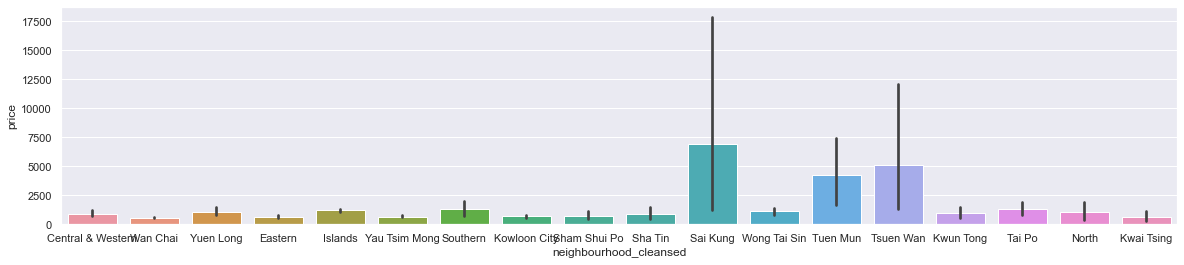

In [102]:
df1.iloc[:,10].isnull().sum()#0
print(df1.iloc[:,10].value_counts())
plt.figure(figsize=(20, 4))
sns.barplot(x = 'neighbourhood_cleansed', y = 'price', data = df1)
#df1.loc['nc_te']


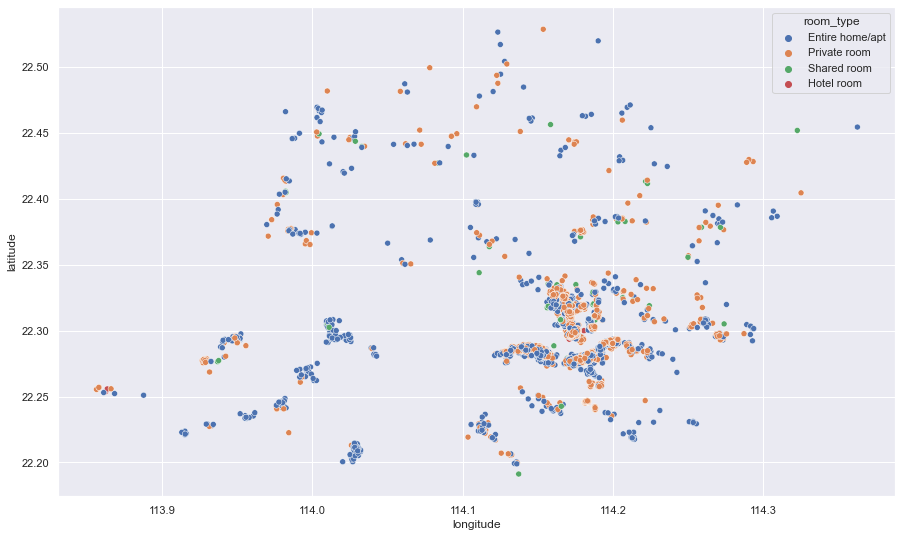

In [103]:
#先畫個圖看看 確定是地區ㄌ
plt.figure(figsize=(15,9))
map = sns.scatterplot(data = df,x='longitude',y='latitude',hue='room_type')#room_type   neighbourhood_cleansed
plt.ioff()

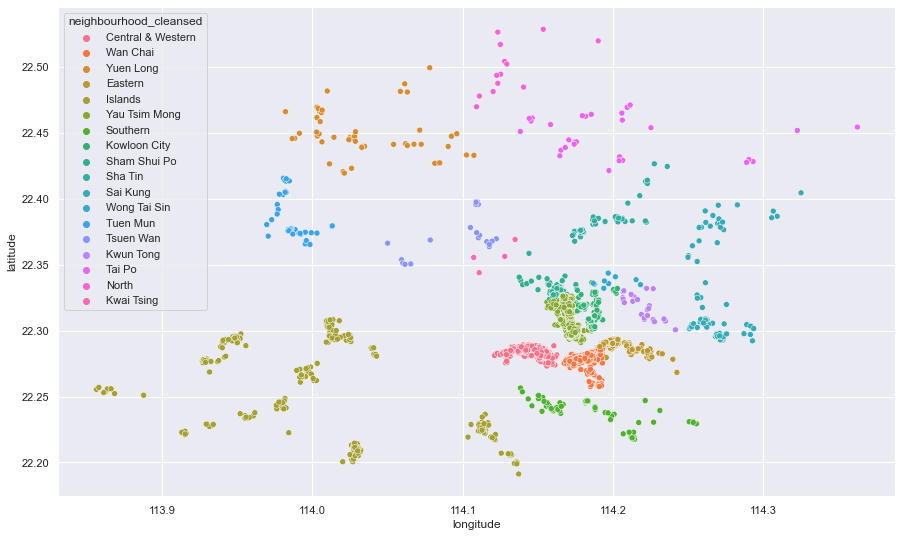

In [104]:
#先畫個圖看看 確定是地區ㄌ
plt.figure(figsize=(15,9))
map = sns.scatterplot(data = df,x='longitude',y='latitude',hue='neighbourhood_cleansed')#room_type   neighbourhood_cleansed
plt.ioff()

因為有些離群值太大，因此好像不太適合用Target Encoding

In [106]:
df1['nc_te'] = df1.groupby('neighbourhood_cleansed')['price'].transform('count')

C:\Users\user\AppData\Local\Temp\ipykernel_33736\2263419207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nc_te'] = df1.groupby('neighbourhood_cleansed')['price'].transform('count')


In [107]:
df1['nc_te']

0       1094
1       1094
2       1094
3       1094
4       1094
        ... 
5931    2114
5932      29
5933      36
5934    1094
5935    2114
Name: nc_te, Length: 5936, dtype: int64

### property_type
One-Hot

In [108]:
df1.iloc[:,11].isnull().sum()#0
print(df1.iloc[:,11].value_counts().head(30))
other_value = ['Houseb','Boat','Tiny h','Campsi','Pensio','Tent','Hut','Religi','Farm s','Dome','Barn']
df1.iloc[:,11] = df1.iloc[:,11].str[0:6].replace('Privat','Private').replace('Room i','Room').replace(other_value,'Other')

#plt.figure(figsize=(20, 4))
#sns.histplot(df1['property_type'],color = 'b')

Yau Tsim Mong        2114
Wan Chai             1278
Central & Western    1094
Islands               324
Kowloon City          245
Eastern               243
Sham Shui Po          163
Southern              139
Sai Kung               95
Yuen Long              52
Sha Tin                42
Tuen Mun               36
Tai Po                 29
Kwun Tong              28
Tsuen Wan              21
Wong Tai Sin           16
North                  13
Kwai Tsing              4
Name: neighbourhood_cleansed, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_33736\3205015703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,11] = df1.iloc[:,11].str[0:6].replace('Privat','Private').replace('Room i','Room').replace(other_value,'Other')


In [109]:
dummy = pd.get_dummies(df1.iloc[:,11])
df1 = df1.join(dummy)

### room_type
One Hot Encoding

Private room in rental unit    2434
Entire rental unit             1425
Entire condo                    367
Entire serviced apartment       228
Shared room in rental unit      222
                               ... 
Shared room in farm stay          1
Religious building                1
Hut                               1
Private room in boat              1
Private room in farm stay         1
Name: property_type, Length: 69, dtype: int64


<AxesSubplot:xlabel='room_type', ylabel='price'>

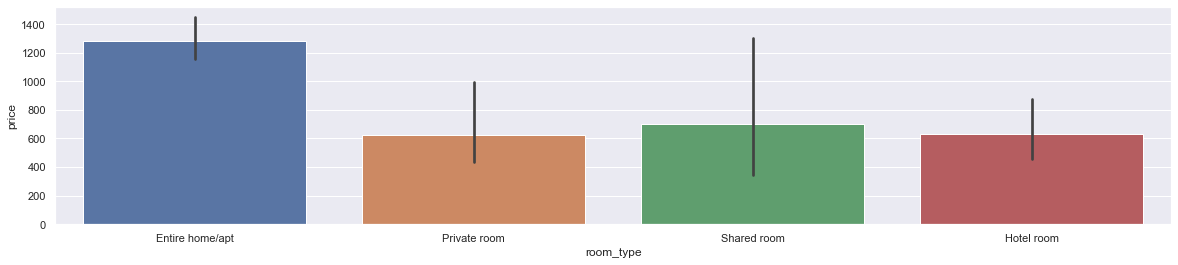

In [110]:
df1.iloc[:,12].isnull().sum()#0
print(df1.iloc[:,12].value_counts())
plt.figure(figsize=(20, 4))
sns.barplot(x = 'room_type', y = 'price', data = df1)


In [111]:
dummy = pd.get_dummies(df1.iloc[:,12])
df1 = df1.join(dummy)

### bathrooms_text

In [112]:
#df1.iloc[:,15].isnull().sum()#19
#print(df1.iloc[:,15].value_counts())

df1['bathrooms_text'] = df1['bathrooms_text'].str.replace(r'[a-z]','').str.replace(r'[A-Z]','').str.replace(' ','').str.replace('-','0.5')
df1['bathrooms_text'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_33736\3203056762.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['bathrooms_text'] = df1['bathrooms_text'].str.replace(r'[a-z]','').str.replace(r'[A-Z]','').str.replace(' ','').str.replace('-','0.5')


1      4930
2       478
1.5     270
3        76
4        41
0.5      35
0        29
2.5      24
3.5       8
8         7
5         7
6         4
10        3
4.5       2
9         1
6.5       1
5.5       1
Name: bathrooms_text, dtype: int64

### bedrooms
遺失值用0

In [113]:
df1['bedrooms'].isnull().sum()#1051
df1['bedrooms'] = df1['bedrooms'].fillna(value=0)
df1['bedrooms'].value_counts()


1.0     4002
0.0     1051
2.0      520
3.0      249
4.0       62
5.0       22
6.0       21
10.0       4
8.0        2
11.0       1
50.0       1
9.0        1
Name: bedrooms, dtype: int64

### beds
遺失值用KNN 或 直接放棄(直接這樣了)
1. 11
2. 12
3. 10
4. 74
5. 71
6. 19
7. 20

In [114]:
df1['beds'].isnull().sum()#98
df1['beds'].value_counts()

1.0     4179
2.0      976
3.0      311
4.0      178
5.0       61
8.0       42
6.0       41
7.0       17
9.0       11
10.0      10
16.0       5
11.0       3
14.0       1
15.0       1
12.0       1
50.0       1
Name: beds, dtype: int64

### amenities(NOT DONE)
One Hot Encoding</P>
正規處理\


In [115]:
#df1.iloc[:,18].isnull().sum()#0
#df1.iloc[:,18][2]#.str.replace(r'')
#df1["amenities"] = 
#df1.iloc[:,18] = df1.iloc[:,18].str.lower()#.replace('{','').replace('}','').replace('"','').replace(' ','_').split(',')
#mlb = MultiLabelBinarizer()
#final_df = df1.join(pd.DataFrame(mlb.fit_transform(df1.pop('amenities')),columns=mlb.classes_,index=df1.index))
#final_df.head()

#df1['amenities'] = df1['amenities'].map(lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\for amn in amns.split(",")]))


In [116]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

def split_list_into_columns(df, column_name, max_dummies_num = 30):
    ''' Split values in columns, which contain lists (for example, amenities) '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        

split_list_into_columns(df1, 'amenities')
df1 = df1.drop(columns = ['amenities'])

In [117]:
df1.iloc[:,30:34].head(5)

,Kwai T,Kwun T,North,Sai Ku
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


### minimum_nights

In [118]:
df1['minimum_nights'].isnull().sum()#0
df1['minimum_nights'].value_counts()

1       1610
29      1226
30       945
28       535
2        369
3        238
31       193
7        138
5        121
60        86
14        62
4         51
10        50
90        40
6         33
180       29
20        25
27        25
365       24
15        18
182       16
25        16
26        10
21         9
100        7
300        7
22         7
8          4
39         3
32         3
120        3
150        2
9          2
88         2
19         2
18         2
11         2
13         2
61         2
1125       1
360        1
291        1
12         1
35         1
59         1
259        1
50         1
600        1
119        1
250        1
70         1
62         1
299        1
190        1
94         1
23         1
Name: minimum_nights, dtype: int64

### number_of_reviews_ltm
過去一年的瀏覽次數，可以當作Y</p>
但感覺也不太準 因為疫情

In [119]:
df1['number_of_reviews_ltm'].isnull().sum()#0
df1['number_of_reviews_ltm'].value_counts()

0     4314
1      465
2      286
3      174
4      114
      ... 
38       1
90       1
52       1
65       1
64       1
Name: number_of_reviews_ltm, Length: 61, dtype: int64

### review_scores_rating
太多遺失值 應該就放棄了

In [120]:
df1['review_scores_rating'].isnull().sum()

3206

### Final Step
delete missing data

In [121]:
df1.iloc[:,1:20].head()

,name,host_id,host_name,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price
0,Large Light Filled Loft,69063,Candace,0,3,0,NaN,0.0,Sheung Wan,"Hong Kong Island, Hong Kong",Centra,Entire rental unit,Entire home/apt,3,NaN,1,0.0,1.0,1400.0
1,SoHo off Hollywood Road 3A,304876,Brend,1,0,96,97.0,0.0,Sheung Wan,NaN,Centra,Entire rental unit,Entire home/apt,2,NaN,1,0.0,1.0,369.0
2,Central Centre 5 min walk to/from Central MTR,304876,Brend,1,0,96,97.0,0.0,Sheung Wan,NaN,Centra,Entire rental unit,Entire home/apt,6,NaN,1,2.0,3.0,1059.0
3,Entire Flat - Next to Man Mo Temple,544166,Celine,1,3,0,100.0,0.0,Mid-Levels,NaN,Centra,Entire rental unit,Entire home/apt,2,NaN,1.5,1.0,1.0,2391.0
4,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,1,0,96,97.0,0.0,Sheung Wan,"Hong Kong Island, Hong Kong",Centra,Entire rental unit,Entire home/apt,6,NaN,1,2.0,3.0,1097.0


In [122]:
#df1['room_type']
df2 = df1.copy()
delete = ['id','name','host_id','host_name','host_neighbourhood','neighbourhood','neighbourhood_cleansed','property_type','room_type','bathrooms','number_of_reviews_l30d','review_scores_rating']
for i in delete:
    df2.pop(i)

df2 = df2.dropna()

# 二、敘述性分析
目標：找到影響價格與點進去看的次數的重要變數</P>
</P>


## 相關性分析 檢視連續變數之間的差別

In [123]:
df3 = df1.copy()
delete2 = ['id','host_location','name','host_id','host_name','host_neighbourhood','neighbourhood','property_type','room_type','bathrooms','review_scores_rating','bathrooms_text','neighbourhood_cleansed']
for i in delete2:
    df3.pop(i)


df3.iloc[:,0:12].head()
df3['host_acceptance_rate'].isnull().sum()

504

In [124]:
#處理price的outlier
max_thresold = df3['price'].quantile(0.95)
min_thresold = df3['price'].quantile(0.05)
min_thresold
df3 = df3[(df3['price']<max_thresold) & (df3['price']>min_thresold)]

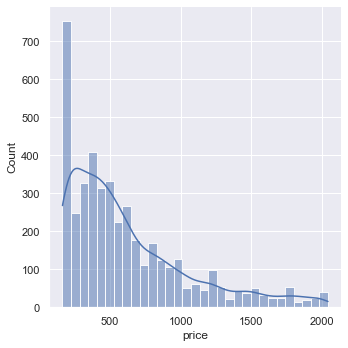

In [125]:
sns.displot(df3['price'],kde = True)

In [126]:
df3.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4385 entries, 0 to 5935
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      4385 non-null   int64  
 1   host_response_rate      4385 non-null   int32  
 2   host_acceptance_rate    3988 non-null   float64
 3   host_is_superhost       4385 non-null   float64
 4   accommodates            4385 non-null   int64  
 5   bedrooms                4385 non-null   float64
 6   beds                    4315 non-null   float64
 7   price                   4385 non-null   float64
 8   minimum_nights          4385 non-null   int64  
 9   number_of_reviews       4385 non-null   int64  
 10  number_of_reviews_ltm   4385 non-null   int64  
 11  number_of_reviews_l30d  4385 non-null   int64  
 12  nc_te                   4385 non-null   int64  
 13  Centra                  4385 non-null   uint8  
 14  Easter                  4385 non-null   

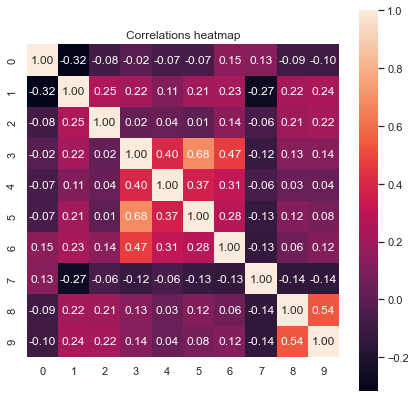

In [127]:
#連續變數
cont = [0,2,3,4,5,6,7,8,9,10]
corrs = np.corrcoef(df3.iloc[:,cont].dropna().values.T)

sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f').set_title('Correlations heatmap')
#print(df3.iloc[:,cont].info)
fig = hm.get_figure()
fig.savefig('correlations.jpg')

## 變異數分析(ANOVA) 檢視連續變數與類別變數的差別
1. 價格與room_type
2. 價格與property_type(Other太雜了 不好分析)
3. 價格與host_location
4. 價格與Superhost
5. number_of_reviews_ltm/number_of_reviews_l30d 與 room_type/property_type

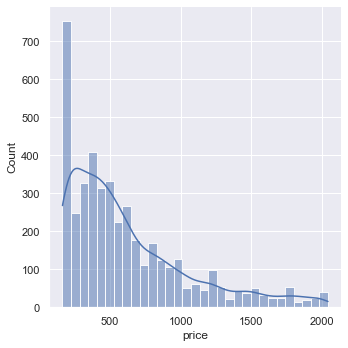

In [128]:
#check price whether is normal dist.
from scipy.stats import normaltest
np.log(df3['price'])
normaltest(np.log(df3['price']))
pic = sns.displot(df3['price'],kde = True)
pic.savefig('price.jpg')

In [129]:
#check price whether is normal dist.

df3['number_of_reviews_ltm'].value_counts()
#sns.displot(df3['number_of_reviews_l30d'])

0      2872
1       430
2       266
3       169
4       107
7        74
5        71
6        59
9        40
8        37
10       34
12       23
11       19
15       18
13       16
14       15
16       13
21       13
20       11
19        8
17        7
24        7
28        7
18        7
22        6
34        6
37        4
32        4
27        3
29        3
25        2
80        2
61        2
86        2
41        2
44        2
23        2
35        2
52        1
90        1
108       1
81        1
42        1
40        1
31        1
94        1
36        1
47        1
49        1
129       1
26        1
33        1
66        1
57        1
38        1
59        1
65        1
64        1
Name: number_of_reviews_ltm, dtype: int64

### 1. price/room_type
結論：Entire home/apt價格顯著較高，其次為Share

Private room       3314
Entire home/apt    2253
Shared room         297
Hotel room           72
Name: room_type, dtype: int64


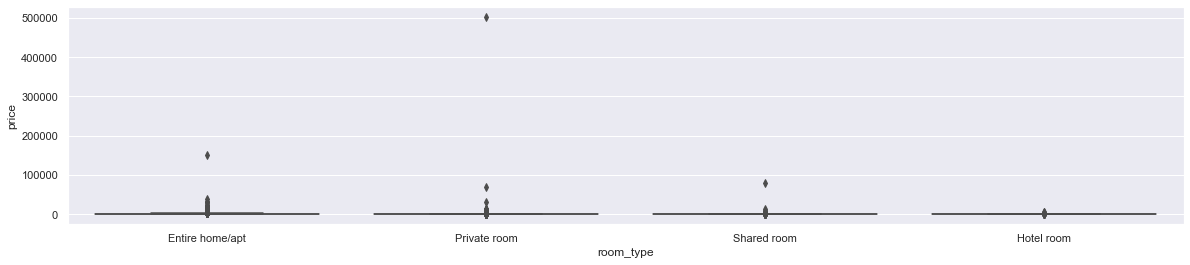

In [187]:
#price
df1['room_type'].isnull().sum()#0
print(df1['room_type'].value_counts())
plt.figure(figsize=(20, 4))
pr = sns.boxplot(x = 'room_type', y = 'price', data = df1)
fig = pr.get_figure()
fig.savefig('pr.jpg')

檢定是否有顯著差別

In [158]:
ano11 = df1[df1 ['room_type'] == 'Private room']['price'].tolist()
ano12 = df1[df1 ['room_type'] == 'Entire home/apt']['price'].tolist()
ano13 = df1[df1 ['room_type'] == 'Shared room']['price'].tolist()
ano14 = df1[df1 ['room_type'] == 'Hotel room']['price'].tolist()

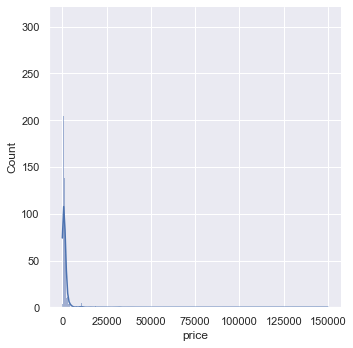

In [159]:
sns.displot(df1[df1 ['room_type'] == 'Entire home/apt']['price'],kde = True)

In [160]:
print(st.shapiro(ano11))
print(st.shapiro(ano12))
print(st.shapiro(ano13))
print(st.shapiro(ano14))


ShapiroResult(statistic=0.016222238540649414, pvalue=0.0)
ShapiroResult(statistic=0.14261311292648315, pvalue=0.0)
ShapiroResult(statistic=0.07791900634765625, pvalue=1.9467750522911022e-35)
ShapiroResult(statistic=0.413688600063324, pvalue=1.9129013033547223e-15)


都不是常態，故使用Kruskal-Wallis檢定(但檢定目標從平均變成中位數了)</P>
https://statistics-using-python.blogspot.com/2019/08/kruskal-wallis-h-testnon-parametric.html

In [161]:
from scipy import stats
print(stats.kruskal(ano11,ano13,ano14))
print(stats.kruskal(ano11,ano14))
print(stats.kruskal(ano11,ano13))
print(stats.kruskal(ano13,ano14))

KruskalResult(statistic=44.61961984440073, pvalue=2.046315804441038e-10)
KruskalResult(statistic=25.474902124429608, pvalue=4.4817530019525357e-07)
KruskalResult(statistic=16.173358652580035, pvalue=5.780134802729404e-05)
KruskalResult(statistic=53.881221226948675, pvalue=2.1298363550646433e-13)


### 2.number_of_reviews_ltm/room_type
結論：Entire home/apt觀看次數顯著較多，其次為Hotel。Private room/Share Room並無顯著差別

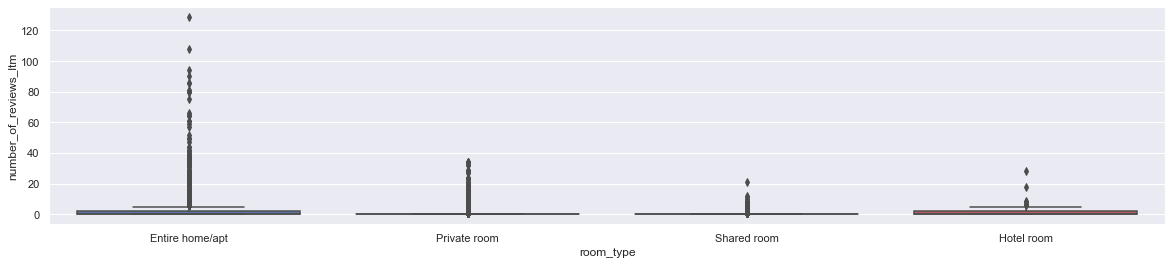

In [186]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
nr = sns.boxplot(x = 'room_type', y = 'number_of_reviews_ltm', data = df1)
fig = nr.get_figure()
fig.savefig('nr.jpg')

檢定是否有顯著差別

In [163]:
ano11 = df1[df1 ['room_type'] == 'Private room']['number_of_reviews_ltm'].tolist()
ano12 = df1[df1 ['room_type'] == 'Entire home/apt']['number_of_reviews_ltm'].tolist()
ano13 = df1[df1 ['room_type'] == 'Shared room']['number_of_reviews_ltm'].tolist()
ano14 = df1[df1 ['room_type'] == 'Hotel room']['number_of_reviews_ltm'].tolist()

In [164]:
print(st.shapiro(ano11))
print(st.shapiro(ano12))
print(st.shapiro(ano13))
print(st.shapiro(ano14))

ShapiroResult(statistic=0.3113607168197632, pvalue=0.0)
ShapiroResult(statistic=0.3737102746963501, pvalue=0.0)
ShapiroResult(statistic=0.3904615640640259, pvalue=2.167858718848615e-30)
ShapiroResult(statistic=0.4964470863342285, pvalue=2.554917845484176e-14)


In [165]:
print(stats.kruskal(ano11,ano12,ano13,ano14))
print(stats.kruskal(ano11,ano13))

KruskalResult(statistic=382.2367624832235, pvalue=1.5580439055072154e-82)
KruskalResult(statistic=1.1480521046814904, pvalue=0.2839572838210159)


### 3.價格與host_location
host不在香港價格較高

<AxesSubplot:xlabel='host_location', ylabel='price'>

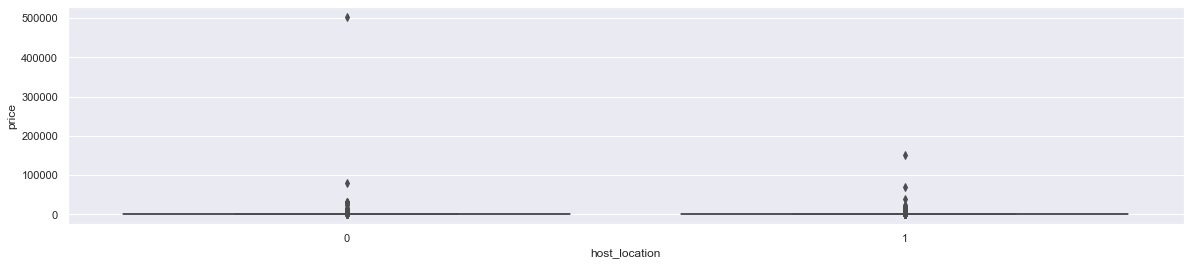

In [185]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
sns.boxplot(x = 'host_location', y = 'price', data = df1)


In [167]:
max_thresold = df1['price'].quantile(0.95)
min_thresold = df1['price'].quantile(0.05)
min_thresold
df4 = df1[(df1['price']<max_thresold) & (df1['price']>min_thresold)]

In [168]:
ano11 = df4[df4['host_location'] == 0]['price'].tolist()
ano12 = df4[df4['host_location'] == 1]['price'].tolist()
print(st.shapiro(ano11))
print(st.shapiro(ano12))
#sns.displot(ano12, kde = True)

ShapiroResult(statistic=0.9016226530075073, pvalue=2.5064689884391373e-30)
ShapiroResult(statistic=0.8310946226119995, pvalue=0.0)


非常態分佈，兩組資料以無母數檢定作分析。

In [169]:
print(stats.kruskal(ano11,ano12))#

KruskalResult(statistic=83.36028023474609, pvalue=6.8382265628801e-20)


### 4.number_of_reviews_ltm與host_location

<AxesSubplot:xlabel='host_location', ylabel='number_of_reviews_ltm'>

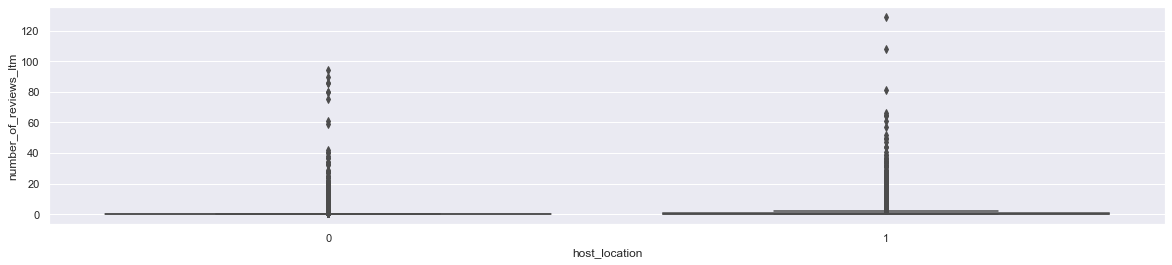

In [184]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
sns.boxplot(x = 'host_location', y = 'number_of_reviews_ltm', data = df1)

In [171]:
ano11 = df4[df4['host_location'] == 0]['number_of_reviews_ltm'].tolist()
ano12 = df4[df4['host_location'] == 1]['number_of_reviews_ltm'].tolist()
print(st.shapiro(ano11))
print(st.shapiro(ano12))
#sns.displot(ano12, kde = True)
print(stats.kruskal(ano11,ano12))#host不在香港還比較好

ShapiroResult(statistic=0.2971993684768677, pvalue=0.0)
ShapiroResult(statistic=0.35550278425216675, pvalue=0.0)
KruskalResult(statistic=20.750886761760803, pvalue=5.230735196872186e-06)


### 5.superhost 與 price
結論：Superhost的價格比較高

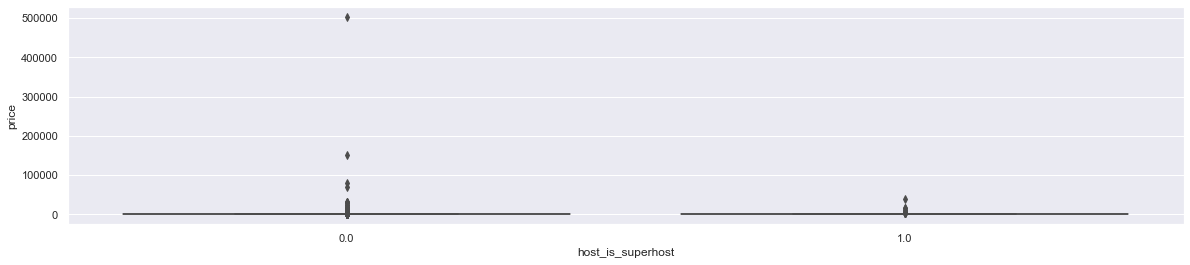

In [188]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
ps = sns.boxplot(x = 'host_is_superhost', y = 'price', data = df1)
fig = ps.get_figure()
fig.savefig('ps.jpg')

In [173]:
ano11 = df4[df4['host_is_superhost'] == 0]['price'].tolist()
ano12 = df4[df4['host_is_superhost'] == 1]['price'].tolist()
print(st.shapiro(ano11))
print(st.shapiro(ano12))
#sns.displot(ano12, kde = True)
print(stats.kruskal(ano11,ano12))#host不在香港還比較好

ShapiroResult(statistic=0.8536533713340759, pvalue=0.0)
ShapiroResult(statistic=0.8735575079917908, pvalue=5.168869254518802e-18)
KruskalResult(statistic=81.16175469036499, pvalue=2.0797822704173329e-19)


### 6.superhost 與 number_of_reviews_ltm
結論：Superhost的曝光度比較高

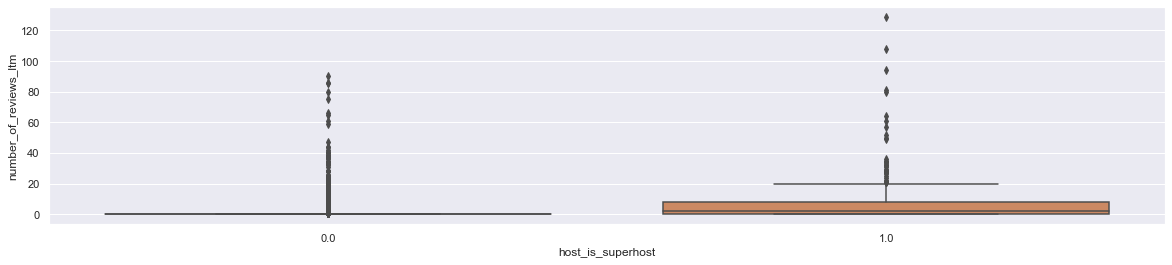

In [189]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
ns = sns.boxplot(x = 'host_is_superhost', y = 'number_of_reviews_ltm', data = df1)
fig = ns.get_figure()
fig.savefig('ns.jpg')

In [175]:
ano11 = df4[df4['host_is_superhost'] == 0]['number_of_reviews_ltm'].tolist()
ano12 = df4[df4['host_is_superhost'] == 1]['number_of_reviews_ltm'].tolist()
print(st.shapiro(ano11))
print(st.shapiro(ano12))
#sns.displot(ano12, kde = True)
print(stats.kruskal(ano11,ano12))#host不在香港還比較好

ShapiroResult(statistic=0.3262788653373718, pvalue=0.0)
ShapiroResult(statistic=0.5122596025466919, pvalue=2.2073330063985218e-32)
KruskalResult(statistic=297.22799236021245, pvalue=1.3234504139133773e-66)


### 7.price/neighbourhood_cleansed
地點與價格有顯著影響

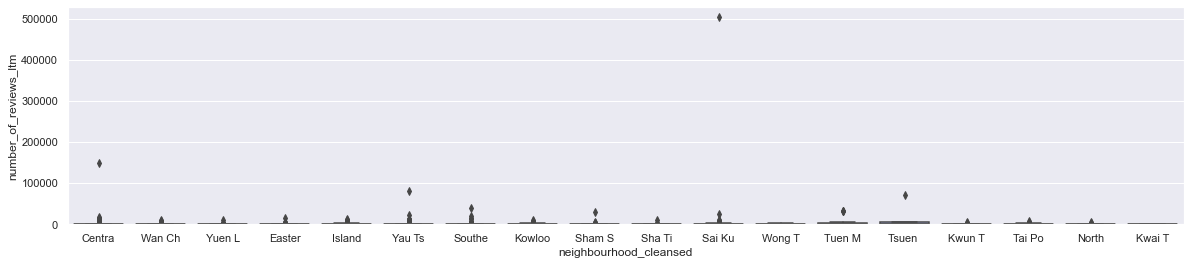

In [190]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'price', data = df1)
ncp = sns.barplot(x = 'neighbourhood_cleansed', y = 'number_of_reviews_ltm', data = df1)
fig = ncp.get_figure()
fig.savefig('ncp.jpg')

In [177]:
df1['neighbourhood_cleansed'].value_counts()

Yau Ts    2114
Wan Ch    1278
Centra    1094
Island     324
Kowloo     245
Easter     243
Sham S     163
Southe     139
Sai Ku      95
Yuen L      52
Sha Ti      42
Tuen M      36
Tai Po      29
Kwun T      28
Tsuen       21
Wong T      16
North       13
Kwai T       4
Name: neighbourhood_cleansed, dtype: int64

In [178]:
ano11 = df1[df1['neighbourhood_cleansed'] == 'Yau']['price'].tolist()
ano12 = df1[df1['neighbourhood_cleansed'] == 'Wan']['price'].tolist()
ano13 = df1[df1['neighbourhood_cleansed'] == 'Central']['price'].tolist()
ano14 = df1[df1['neighbourhood_cleansed'] == 'Islands']['price'].tolist()
ano15 = df1[df1['neighbourhood_cleansed'] == 'Kowloon']['price'].tolist()
ano16 = df1[df1['neighbourhood_cleansed'] == 'Eastern']['price'].tolist()
ano17 = df1[df1['neighbourhood_cleansed'] == 'Sham']['price'].tolist()
#sns.displot(ano12, kde = True)

### 8.number_of_reviews_ltm / neighbourhood_cleansed


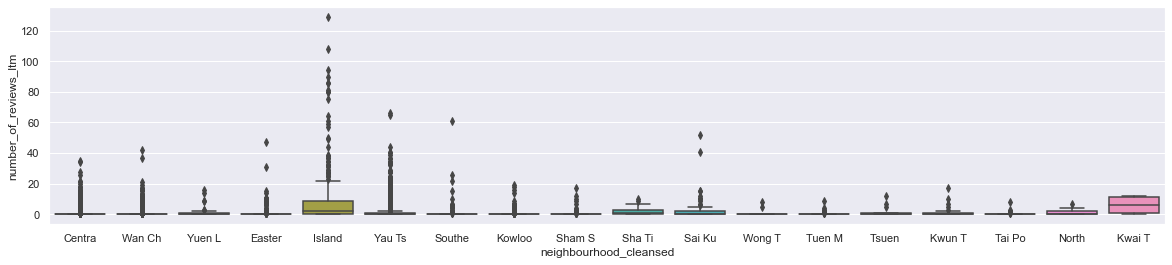

In [191]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
ncn = sns.boxplot(x = 'neighbourhood_cleansed', y = 'number_of_reviews_ltm', data = df1)
fig = ncn.get_figure()
fig.savefig('ncn.jpg')

In [180]:
ano11 = df1[df1['neighbourhood_cleansed'] == 'Yau']['number_of_reviews_ltm'].tolist()
ano12 = df1[df1['neighbourhood_cleansed'] == 'Wan']['number_of_reviews_ltm'].tolist()
ano13 = df1[df1['neighbourhood_cleansed'] == 'Central']['number_of_reviews_ltm'].tolist()
ano14 = df1[df1['neighbourhood_cleansed'] == 'Islands']['number_of_reviews_ltm'].tolist()
ano15 = df1[df1['neighbourhood_cleansed'] == 'Kowloon']['number_of_reviews_ltm'].tolist()
ano16 = df1[df1['neighbourhood_cleansed'] == 'Eastern']['number_of_reviews_ltm'].tolist()
ano17 = df1[df1['neighbourhood_cleansed'] == 'Sham']['number_of_reviews_ltm'].tolist()
print(stats.kruskal(ano11,ano12,ano13,ano14,ano15,ano16,ano17))#host不在香港還比較好

KruskalResult(statistic=nan, pvalue=nan)


### Regression amenities


我們利用迴歸分析，檢視各項設施中，哪些東西的出現會影響到PRICE。</P>
最後發現有以下幾項P值小於0.05，表示與價格有顯著關聯。
1. TV
2. Elevator
3. Refrigerator
4. Smoke alarm 
5. Dishes and silverware
6. Long term stays allowed
7. Self check-in

根據這幾項，我們可以稍微猜一下應該由於房型為飯店或是獨棟的住處，故有些設施是有的(例如冰箱、Self check-in等很有可能是獨棟住處，而Smoke alarm 極有可能是出現在飯店的東西，或是獨棟住處有些也有可能)

In [181]:
df1.iloc[:,34:].head(2)

,Sha Ti,Sham S,Southe,Tai Po,Tsuen,Tuen M,Wan Ch,Wong T,Yau Ts,Yuen L,...,amenities_ Microwave,amenities_ Private entrance,amenities_ Lock on bedroom door,amenities_ Self check-in,amenities_ Heating,amenities_ First aid kit,amenities_ Extra pillows and blankets,amenities_ Hot water kettle,amenities_ Shower gel,amenities_ Luggage dropoff allowed
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [194]:
import statsmodels.api as sm
X = df1.iloc[:,113:]
Y = df1['price']

model = sm.OLS(Y,X)
result=model.fit()
print(result.summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):              0.027
Method:                 Least Squares   F-statistic:                              6.396
Date:                Tue, 06 Jun 2023   Prob (F-statistic):                    4.90e-25
Time:                        02:54:50   Log-Likelihood:                         -61022.
No. Observations:                5936   AIC:                                  1.221e+05
Df Residuals:                    5906   BIC:                                  1.223e+05
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

我們以用同樣方法，檢視哪些設施的出現會和number_of_reviews_ltm有關。</P>
最後發現有以下幾項P值小於0.05，表示與價格有顯著關聯。
1. Wifi
2. Air conditioning 
3. Shampoo
4. TV
5. Elevator
6. Smoke alarm
7. Dishes and silverware
8. Long term stays allowed
9. Microwave
10. Private entrance
11. Lock on bedroom door
12. Self check-in
13. Extra pillows and blankets 
14. Hot water kettle
15. Shower gel


In [193]:
#import statsmodels.api as sm
X = df1.iloc[:,113:]
Y = df1['number_of_reviews_ltm']

model = sm.OLS(Y,X)
result=model.fit()
print(result.summary())

                                  OLS Regression Results                                  
Dep. Variable:     number_of_reviews_ltm   R-squared (uncentered):                   0.196
Model:                               OLS   Adj. R-squared (uncentered):              0.192
Method:                    Least Squares   F-statistic:                              47.99
Date:                   Tue, 06 Jun 2023   Prob (F-statistic):                   1.01e-252
Time:                           02:54:41   Log-Likelihood:                         -18811.
No. Observations:                   5936   AIC:                                  3.768e+04
Df Residuals:                       5906   BIC:                                  3.788e+04
Df Model:                             30                                                  
Covariance Type:               nonrobust                                                  
                                            coef    std err          t      P>|t|      [0.

# 三、結論

## 1.分析內容統整
透過第二節的敘述性分析，我們可以得到以下結論。
1. 連續變數</P>
   透過熱力圖可以看到，會影響價格的連續型變數有accommodates、bedrooms和bed。而這蠻符合邏輯的，能夠容納越多人的房間自然就會有較高的價格。

2. 類別變數</P>
   針對類別變數，整體而言無論是room_type, host_location, neighborhood等以統計數值來看的確有差距，然而由於離群值太多，很難從箱型圖上比較出結果。或許在處理資料的時候還是需要考慮離群值的部分。

3. amenities</P>
   根據迴歸分析的結果，找到了與價格相關的的設施，日後若要在香港設至airbnb可以參考，或許可能有些幫助獲得更好的營收。但實際上這都只是統計出來的結果，很難找到其中的因果相關，能推敲的原因可能是某些設施是在飯店，或是獨棟住處比較容易出現的關係。但就要再做下一步的檢驗。

至於為何沒有對number_of_reviews_ltm的部分做說明，會與下一截的內容有關。

## 2.研究限制
首先先講到為何後來說明並沒有提到number_of_reviews_ltm。起初的想法是希望透過該變數視為該住處的人氣程度，然而實際上以一般消費者而言，通常會留下評論的情況，不是因為可以取得優惠，就是服務實在太差故留下負評，很難實際代表是真的好還是壞。</P>
接下來將對這個報告還可以再改善、或是受限的部分做說明；
1. 資料受限部分
   該資料都是從AIRBNB上所蒐集，撇除遺失值的部分，該資料多數都是提供「供給」面相關的資料，然而應該也要從其他面向進行分析，例如估計接下來一年的觀光人潮、每團觀光的人數大概多少人、家庭旅遊或是自由行的比例大概如何之類的資訊。</P>
2. 改善的部分
   有兩個部分可以著手進行改善：一為再針對設施與房型的關係再作分析，例如馬賽克圖等等都是不錯的方法；二為遺失值的處理方式，這次都是只用較簡單的填值或是直接刪去，應該可以嘗試用KNN法以及更細膩的處理方式。